In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')

In [12]:
print(test_file.shape)

(28000, 784)


In [13]:
print(train_file.shape)

(42000, 785)


In [14]:
df_x=train_file.iloc[:,1:]
df_y=train_file.iloc[:,0]

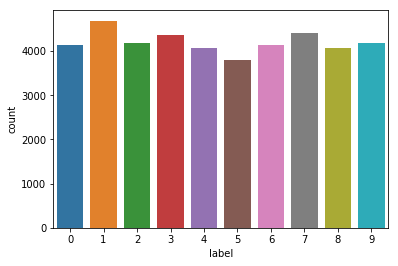

In [15]:
import seaborn as sns
sns.countplot(df_y)

In [16]:
import time
start_time = time.time()
clf=RandomForestClassifier(n_estimators=500,warm_start = True, oob_score =True, random_state = 42,
                           max_features="sqrt")
RF = clf.fit(df_x,df_y)
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=True)

In [17]:

error = 1 - clf.oob_score_
accuracy = 1 - error

print("Accuracy Percentage   : ",(round(accuracy, 4) *100), "%")
print("Error Percentage      : ",(round(error, 4) *100), "%")

Accuracy Percentage   :  96.74000000000001 %
Error Percentage      :  3.26 %


In [18]:
prediction_test = clf.predict(test_file)

In [19]:
display(prediction_test)

array([2, 0, 9, ..., 3, 9, 2])

In [20]:
results_data = pd.DataFrame({'ImageId': range(1, len(prediction_test)+1), 'Label': prediction_test})
results_data.to_csv('results.csv', sep=',', index=False)